# Variation of Stability Ratio ($S_r$) with Isomerization Rate ($k_I$ ) and Degradation Rate of Repressor ($k_{deg}$)

## Imports

In [2]:
import scipy.io
import cmath
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as mticker
from prettytable import PrettyTable
%matplotlib inline

## Fixed Parameters

In [1]:
n = 3
kp = 1.5 * 10**(10)
P = 100 * 10**(-9)
a = 3.3
kr = 2 * 10^(11)

## Calculating values of $S_r$ for different values of $k_r$

In [4]:
x_ticks = []
kl_val = []
kdeg_p = [10**(-2),10**(-4),10**(-6)]
x_know = []
x_array = []
itr1_array = []
for j in range(6,-2,-1):
    x_ticks.append(10**(-j))

for kdeg in kdeg_p:
    x  = []
    itr1 = []
    for j in range(20,-5,-1):
        i = -j/4
        kl = 10**(i)
        kl_val.append(kl)
        a1 = kdeg*kr
        b = (1+kp*P)*kdeg
        c = -n*kp*P*kl*a
        d = (b**2) - (4*a1*c)
        R = (-b+cmath.sqrt(d))/(2*a1)
        R = np.real(R)
#         print(R)
        Sunreg = -kdeg
        Sauto = -(n*kp*P*kl*a*kr)/((1+kp*P+kr*R)**2) - kdeg
        Sr = Sauto/Sunreg
        x.append(Sr)
        itr1.append(i)
    x_array.append(x)
    itr1_array.append(itr1)

## Plotting Graph for variation of Stability Ratio ($S_r$) with Isomerization Rate ($k_I$ )

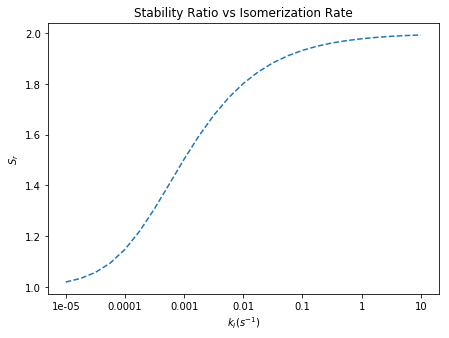

In [7]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
locs = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticklabels(x_ticks)
ax.set_xlabel('$k_I (s^{-1})$')
ax.set_ylabel('$S_{r}$')
ax.plot(itr1_array[1], x_array[1], label="$k_{deg}=1e-4$",linestyle='dashed')
plt.title("Stability Ratio vs Isomerization Rate");

## Summary Table

In [8]:
t = PrettyTable(["","k_I","S_r"])
iternum = 0
for j in range(0,25,4):
    iternum +=1
    t.add_row([iternum, x_ticks[iternum], round(x_array[1][j],3) ])
#     print("\\textbf{" + str(iternum) + "}  & " + str()+ " & "+  str() + "\\\\ \hline")
print(t)

+---+--------+-------+
|   |  k_I   |  S_r  |
+---+--------+-------+
| 1 | 1e-05  |  1.02 |
| 2 | 0.0001 | 1.148 |
| 3 | 0.001  | 1.504 |
| 4 |  0.01  | 1.802 |
| 5 |  0.1   | 1.932 |
| 6 |   1    | 1.978 |
| 7 |   10   | 1.993 |
+---+--------+-------+


## Conclusion

It can be inferred from Figure and Table that the value of Stability ratio increases and saturates to $2$, as we increase the isomerization rate. Hence, **autoregulated system is much more stable than unregulated if we set the value of isomerization rate accordingly**.

## Plotting Graph for variation of Stability Ratio ($S_r$) with Degradation Rate of Repressor ($k_{deg}$)

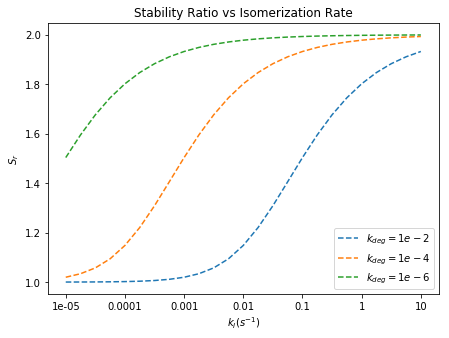

In [11]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
locs = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticklabels(x_ticks)
ax.set_xlabel('$k_I (s^{-1})$')
ax.set_ylabel('$S_{r}$')
ax.plot(itr1_array[0], x_array[0], label="$k_{deg}=1e-2$",linestyle='dashed')
ax.plot(itr1_array[1], x_array[1], label="$k_{deg}=1e-4$",linestyle='dashed')
ax.plot(itr1_array[2], x_array[2], label="$k_{deg}=1e-6$",linestyle='dashed')
plt.title("Stability Ratio vs Isomerization Rate")
plt.legend();

## Summary Table

In [13]:
t = PrettyTable(["","k_I","$S_r(k_deg = 1e − 2)$","$S_r(k_deg = 1e − 4)$","$(k_deg = 1e − 6)$"])
iternum = 0
for j in range(0,25,4):
    iternum +=1
    t.add_row([iternum, x_ticks[iternum], round(x_array[2][j],3), round(x_array[1][j],3), round(x_array[0][j],3) ])
print(t)

+---+--------+-----------------------+-----------------------+--------------------+
|   |  k_I   | $S_r(k_deg = 1e − 2)$ | $S_r(k_deg = 1e − 4)$ | $(k_deg = 1e − 6)$ |
+---+--------+-----------------------+-----------------------+--------------------+
| 1 | 1e-05  |         1.504         |          1.02         |        1.0         |
| 2 | 0.0001 |         1.802         |         1.148         |       1.002        |
| 3 | 0.001  |         1.932         |         1.504         |        1.02        |
| 4 |  0.01  |         1.978         |         1.802         |       1.148        |
| 5 |  0.1   |         1.993         |         1.932         |       1.504        |
| 6 |   1    |         1.998         |         1.978         |       1.802        |
| 7 |   10   |         1.999         |         1.993         |       1.932        |
+---+--------+-----------------------+-----------------------+--------------------+


## Conclusion

We can infer from above Figure and Table that stability ratio is higher when value of $k_deg$ is lower. Thus, the **stability of the system decreases when the repressor has short half-life if we keep all the other parameters constant**.